# Marine protected sites

In [1]:
import os
from datetime import datetime, timezone
from zipfile import ZipFile

import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch

## Dublin Bay Biosphere Marine Zones

<https://data.gov.ie/dataset/dublin-bay-biosphere-marine-zones>

In [2]:
# base data download directory
DATA_DIR = os.path.join("data", "marine")
os.makedirs(DATA_DIR, exist_ok=True)

URL = (
    "https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::"
    "dublin-bay-biosphere-marine-zones.zip?"
    "outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
)
KNOWN_HASH = None
FILE_NAME = "dublin-bay-biosphere-marine-zones.zip"
DATA_FILE = os.path.join(DATA_DIR, FILE_NAME)

# basemap cache directory
cx.set_cache_dir(os.path.join("data", "basemaps"))

In [3]:
# download data if necessary
if not os.path.isfile(DATA_FILE):
    pooch.retrieve(
        url=URL,
        known_hash=KNOWN_HASH,
        fname=FILE_NAME,
        path=DATA_DIR
    )

    with open(f"{DATA_FILE[:-4]}.txt", "w", encoding="utf-8") as outfile:
        outfile.write(
            f"Data downloaded on: {datetime.now(tz=timezone.utc)}\n"
            f"Download URL: {URL}"
        )

SHA256 hash of downloaded file: ea920fdeda9d016b3c33565c24abeefcc8e40a80f8db080c900001711829d95f
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


In [4]:
with open(f"{DATA_FILE[:-4]}.txt") as f:
    print(f.read())

Data downloaded on: 2023-10-29 21:38:22.329930+00:00
Download URL: https://data-housinggovie.opendata.arcgis.com/datasets/housinggovie::dublin-bay-biosphere-marine-zones.zip?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D


In [5]:
ZipFile(DATA_FILE).namelist()

['Protected_Marine_Sites.shp',
 'Protected_Marine_Sites.shx',
 'Protected_Marine_Sites.dbf',
 'Protected_Marine_Sites.cpg',
 'Protected_Marine_Sites.prj',
 'Protected_Marine_Sites.xml']

In [3]:
data = gpd.read_file(
    os.path.join(
        f"zip://{DATA_FILE}!" +
        [x for x in ZipFile(DATA_FILE).namelist() if x.endswith(".shp")][0]
    )
)

In [4]:
data

,zone,Last_Updat,Policy01_N,Policy02_N,Policy03_N,Owning_Org,Metadata_L,Map_Featur,OBJECTID,MI_Map_num,...,Policy05_C,Policy06_N,Policy06_P,Policy06_C,Policy07_N,Policy07_P,Policy07_C,Shape__Are,Shape__Len,geometry
0,Core Zone Marine,2015,Protected Marine Sites Policy 2,Protected Marine Sites Policy 3,Protected Marine Sites Policy 4,Dublin Bay Biosphere Partnership,http://data.marine.ie/geonetwork/srv/eng/catal...,"Dublin Bay Biosphere (core, buffer and transit...",1,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.236502e+08,185984.749493,"MULTIPOLYGON (((-677908.996 7034902.352, -6778..."
1,Buffer Zone Marine,2015,Protected Marine Sites Policy 2,Protected Marine Sites Policy 3,Protected Marine Sites Policy 4,Dublin Bay Biosphere Partnership,http://data.marine.ie/geonetwork/srv/eng/catal...,"Dublin Bay Biosphere (core, buffer and transit...",2,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.609494e+07,150910.161334,"MULTIPOLYGON (((-674030.946 7055585.075, -6739..."
2,Transitional Zone Marine,2015,Protected Marine Sites Policy 2,Protected Marine Sites Policy 3,Protected Marine Sites Policy 4,Dublin Bay Biosphere Partnership,http://data.marine.ie/geonetwork/srv/eng/catal...,"Dublin Bay Biosphere (core, buffer and transit...",3,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.036480e+08,169461.945780,"MULTIPOLYGON (((-682500.494 7039258.930, -6824..."


In [5]:
data.shape

(3, 27)

In [6]:
data.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

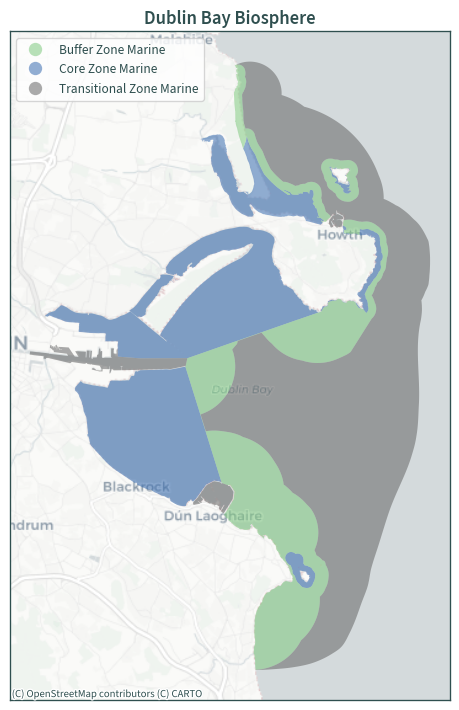

In [4]:
ax = data.plot(
    figsize=(7.5, 7.5), column="zone", legend=True, cmap="Accent", alpha=.55,
    legend_kwds={"loc": "upper left"}
)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=11)
plt.title("Dublin Bay Biosphere")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()

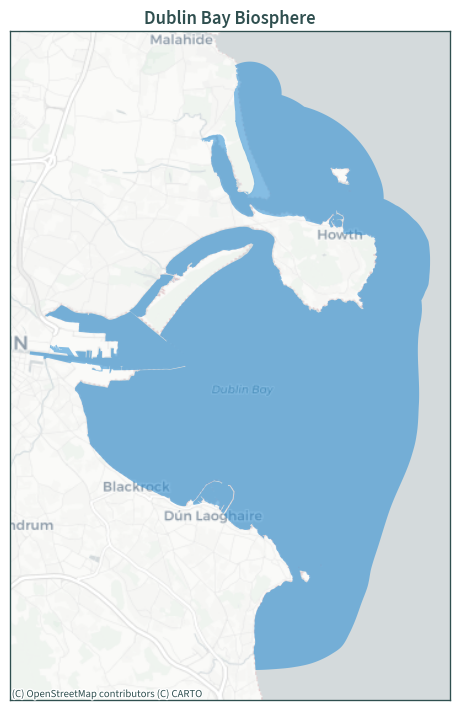

In [8]:
ax = data.dissolve().plot(figsize=(7.5, 7.5), alpha=.55)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron, zoom=11)
plt.title("Dublin Bay Biosphere")

plt.tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()